In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from keras import models, layers

import tkinter as tk
from tkinter import *
from tkinter import messagebox
from tkinter import filedialog

import os

# 데이터 불러오기

In [2]:
df = pd.read_csv('./배터리 데이터.csv', engine='python')
df.describe()
# df.head()

,Voltage(V),Current(A),Capacity(Ah),Impedance(MOhm),Code,Grade,StepNo,Power(W),wattHour(Wh),OvenTemperature(`C),...,CommState,Voltage Input,Voltage Power,Voltage Bus,OutputState,InputState,CV Day,LoadVlotage,LoadCurrent,LoadPower
count,2500.000000,2500.000000,2500.000000,2500.0,0.0,0.0,2500.0,2500.000000,2500.000000,2500.0,...,2500.0,0.0,0.0,0.0,0.0,0.0,2500.0,2500.0,2500.0,2500.0
mean,64.987584,-0.092942,-0.082627,0.0,NaN,NaN,11.0,-1.463385,-5.150099,0.0,...,12.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
std,1.057681,4.494579,0.044406,0.0,NaN,NaN,0.0,292.745412,2.927096,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
min,63.346000,-8.509000,-0.135000,0.0,NaN,NaN,11.0,-541.041000,-8.625000,0.0,...,12.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
25%,63.829000,-3.503000,-0.116000,0.0,NaN,NaN,11.0,-225.719500,-7.366000,0.0,...,12.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
50%,65.206500,-0.999000,-0.102000,0.0,NaN,NaN,11.0,-65.139500,-6.435000,0.0,...,12.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
75%,65.647000,3.002000,-0.052000,0.0,NaN,NaN,11.0,196.892750,-3.206750,0.0,...,12.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
max,67.359000,9.361000,0.005000,0.0,NaN,NaN,11.0,630.527000,0.768000,0.0,...,12.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [3]:
# pd.to_datetime(df['Date'], format='%Y-%m-%d')
# # 2020-01-07

# df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
# df['year'] =df['Date'].dt.year
# df['month'] =df['Date'].dt.month
# df['day'] =df['Date'].dt.day
df['Voltage(V)']

0       63.815
1       63.808
2       63.825
3       63.812
4       63.808
         ...  
2495    64.260
2496    64.219
2497    64.205
2498    64.175
2499    64.141
Name: Voltage(V), Length: 2500, dtype: float64

# 데이터 시각화

Text(0, 0.5, 'Aux Volt. Max')

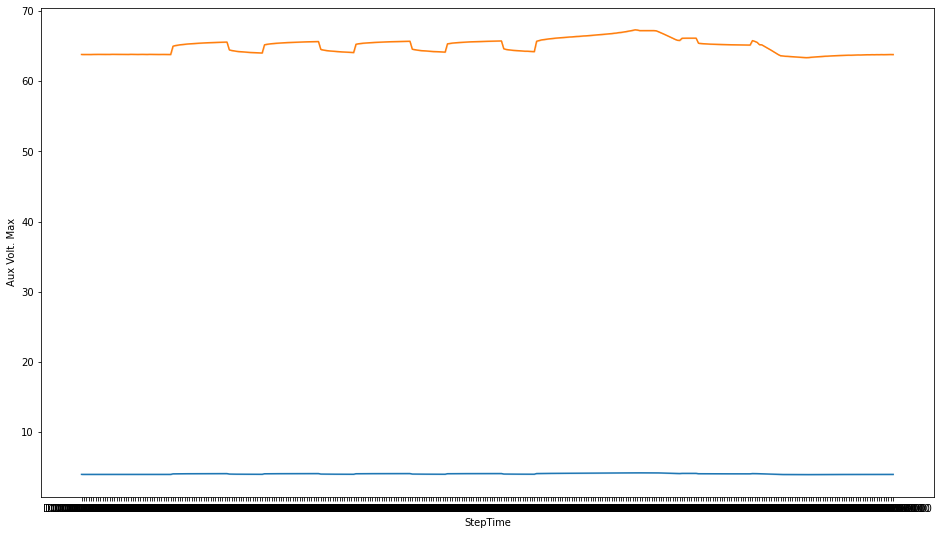

In [4]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['Aux Volt. Max'], x=df['StepTime'])
sns.lineplot(y=df['Voltage(V)'], x=df['StepTime'])
plt.xlabel('StepTime')
plt.ylabel('Aux Volt. Max')

# 데이터 Normalization

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['Aux Temp. Max', 'Aux Temp. Min', 'Current(A)', 'Capacity(Ah)', 'Aux Volt. Dev.']
df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

print(df_scaled)

      Aux Temp. Max  Aux Temp. Min  Current(A)  Capacity(Ah)  Aux Volt. Dev.
0          0.833333       0.833333    0.235646      0.278571            0.36
1          0.916667       0.750000    0.235758      0.271429            0.36
2          0.916667       0.750000    0.241074      0.257143            0.32
3          0.916667       0.750000    0.241074      0.250000            0.36
4          0.916667       0.750000    0.240795      0.242857            0.36
...             ...            ...         ...           ...             ...
2495       0.500000       0.583333    0.280246      0.121429            0.36
2496       0.500000       0.583333    0.280246      0.114286            0.40
2497       0.500000       0.583333    0.285674      0.107143            0.36
2498       0.500000       0.583333    0.285674      0.100000            0.36
2499       0.583333       0.583333    0.285674      0.092857            0.40

[2500 rows x 5 columns]


Text(0, 0.5, 'Aux Volt. Max')

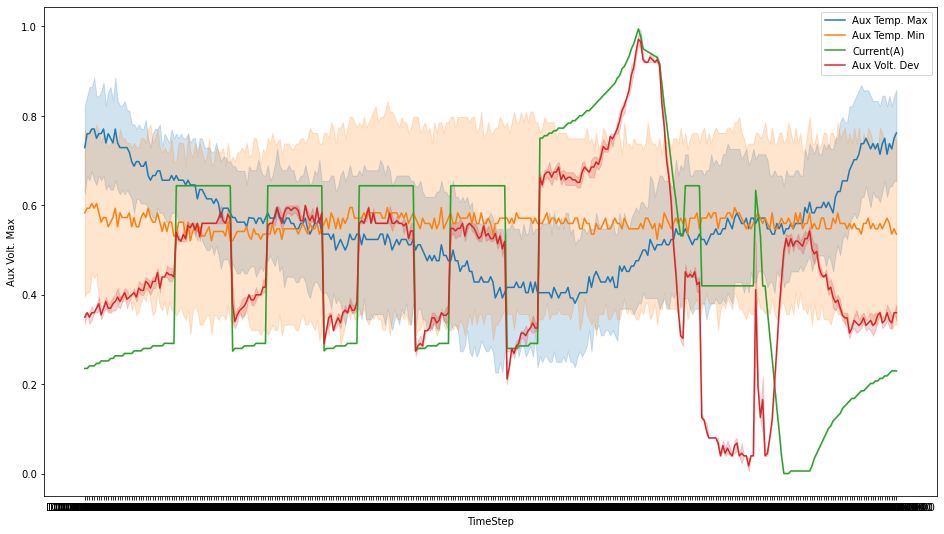

In [6]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df_scaled['Aux Temp. Max'], x=df['StepTime'], label='Aux Temp. Max')
sns.lineplot(y=df_scaled['Aux Temp. Min'], x=df['StepTime'], label='Aux Temp. Min')
sns.lineplot(y=df_scaled['Current(A)'], x=df['StepTime'], label='Current(A)')
sns.lineplot(y=df_scaled['Aux Volt. Dev.'], x=df['StepTime'], label='Aux Volt. Dev')
plt.legend()
plt.xlabel('TimeStep')
plt.ylabel('Aux Volt. Max')

# 데이터셋 생성

In [7]:
TEST_SIZE = 500
### 과거부터 500 타임스텝 이전의 데이터를 학습하게 되고, TEST를 위해서 이후 500 타임스텝의 데이터로 모델이 주가를 예측하도록

In [8]:
train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

def make_dataset(data, label, window_size=15): # window_size에 기반하여 15일 기간의 데이터 셋을 묶어 주는 역할
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

# feature와 label 정의

In [9]:
feature_cols = ['Aux Temp. Max', 'Aux Temp. Min', 'Current(A)']
# feature_cols = ['Aux Temp. Max', 'Aux Temp. Min', 'Current(A)', 'Capacity(Ah)']
label_cols = ['Aux Volt. Dev.']

train_feature = train[feature_cols]
train_label = train[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)
print(train_feature.shape, train_label.shape)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

print(x_train.shape, x_valid.shape)

test_feature = test[feature_cols]
test_label = test[label_cols]

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 20)
print(test_feature.shape, test_label.shape)
# ((180, 20, 4), (180, 1))

(1980, 20, 3) (1980, 1)
(1584, 20, 3) (396, 20, 3)
(480, 20, 3) (480, 1)


# LSTM 모델 생성

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(32, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=True)
          )
model.add(LSTM(32,
               activation='relu', 
               return_sequences=True)
          )
model.add(LSTM(32,
               activation='sigmoid', 
               return_sequences=True)
          )
model.add(LSTM(16,
               activation='sigmoid', 
               return_sequences=False)
          )
model.add(Dense(1))

In [ ]:
model_path = "./"

model.compile(loss='MSE', optimizer='adam', metrics=['MAE'])
early_stop = EarlyStopping(monitor='val_MAE', patience=5)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=128,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint]
                   )

Epoch 1/200
11/13 [========================>.....] - ETA: 0s - loss: 0.1575 - MAE: 0.3419
Epoch 1: val_loss improved from inf to 0.03903, saving model to .\tmp_checkpoint.h5
13/13 [==============================] - 4s 69ms/step - loss: 0.1442 - MAE: 0.3208 - val_loss: 0.0390 - val_MAE: 0.1561
Epoch 2/200
13/13 [==============================] - ETA: 0s - loss: 0.0461 - MAE: 0.1675
Epoch 2: val_loss did not improve from 0.03903
13/13 [==============================] - 0s 26ms/step - loss: 0.0461 - MAE: 0.1675 - val_loss: 0.0489 - val_MAE: 0.1690
Epoch 3/200
13/13 [==============================] - ETA: 0s - loss: 0.0381 - MAE: 0.1516
Epoch 3: val_loss did not improve from 0.03903
13/13 [==============================] - 0s 26ms/step - loss: 0.0381 - MAE: 0.1516 - val_loss: 0.0398 - val_MAE: 0.1568
Epoch 4/200
13/13 [==============================] - ETA: 0s - loss: 0.0372 - MAE: 0.1509
Epoch 4: val_loss improved from 0.03903 to 0.03882, saving model to .\tmp_checkpoint.h5
13/13 [=======

Epoch 30/200
11/13 [========================>.....] - ETA: 0s - loss: 0.0069 - MAE: 0.0583
Epoch 30: val_loss did not improve from 0.00668
13/13 [==============================] - 0s 30ms/step - loss: 0.0067 - MAE: 0.0576 - val_loss: 0.0068 - val_MAE: 0.0603
Epoch 31/200
11/13 [========================>.....] - ETA: 0s - loss: 0.0064 - MAE: 0.0556
Epoch 31: val_loss improved from 0.00668 to 0.00588, saving model to .\tmp_checkpoint.h5
13/13 [==============================] - 0s 30ms/step - loss: 0.0063 - MAE: 0.0551 - val_loss: 0.0059 - val_MAE: 0.0562
Epoch 32/200
12/13 [==========================>...] - ETA: 0s - loss: 0.0061 - MAE: 0.0541
Epoch 32: val_loss improved from 0.00588 to 0.00555, saving model to .\tmp_checkpoint.h5
13/13 [==============================] - 0s 31ms/step - loss: 0.0061 - MAE: 0.0544 - val_loss: 0.0056 - val_MAE: 0.0522
Epoch 33/200
11/13 [========================>.....] - ETA: 0s - loss: 0.0062 - MAE: 0.0546
Epoch 33: val_loss did not improve from 0.00555
13

In [82]:
# weight 로딩
model.load_weights(filename)

# 예측
pred = model.predict(test_feature)

#평가
test_loss, test_acc = model.evaluate(test_feature, test_label, verbose=2)
print('Loss : ',test_loss)

15/15 - 1s - loss: 0.0056 - MAE: 0.0540
Loss :  0.005587351508438587


# 실제데이터와 예측한 데이터 시각화

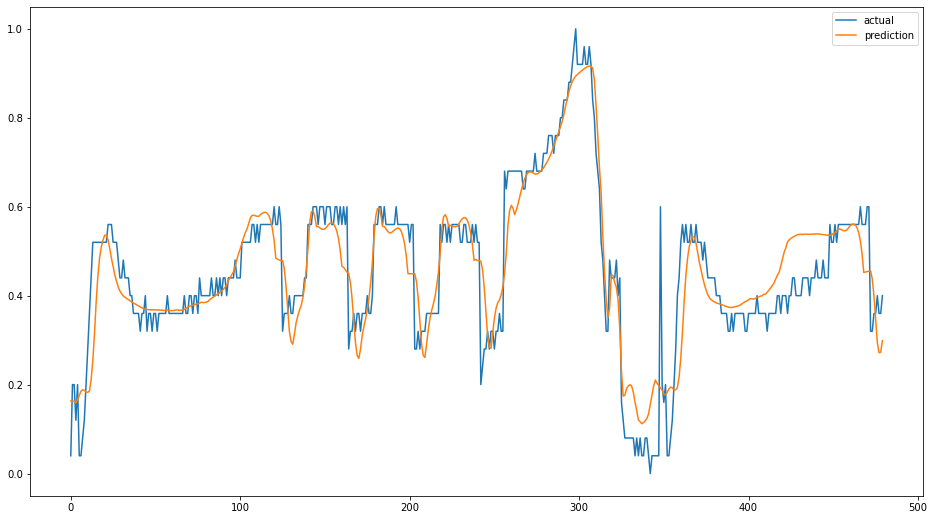

In [83]:
plt.figure(figsize=(16, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()